# Gráficos do delivey bot

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from glob import glob

## Carregar dados dos métodos do delivery-bot

In [184]:
astar_csv = glob('./dist/*astar*.csv')
astar_dfs = []
for df in astar_csv:
    astar_dfs.append(pd.read_csv(df))

In [185]:
dijkstra_csv = glob('./dist/*dijkstra*.csv')
dijkstra_dfs = []
for df in dijkstra_csv:
    dijkstra_dfs.append(pd.read_csv(df))

In [186]:
greedy_best_first_search_csv = glob('./dist/*greedy_best_first_search*.csv')
greedy_best_first_search_dfs = []
for df in greedy_best_first_search_csv:
    greedy_best_first_search_dfs.append(pd.read_csv(df))

In [187]:
own_csv = astar_csv = glob('./dist/*own*.csv')
own_dfs = []
for df in own_csv:
    own_dfs.append(pd.read_csv(df))

## Transformar os CSVs em DataFrames

In [188]:
media_astar_df = pd.DataFrame(0, index=astar_dfs[0].index, columns=astar_dfs[0].columns)
for df in astar_dfs:
    media_astar_df += df
media_astar_df = media_astar_df/len(astar_dfs)

In [189]:
media_dijkstra_df = pd.DataFrame(0, index=dijkstra_dfs[0].index, columns=dijkstra_dfs[0].columns)
for df in dijkstra_dfs:
    media_dijkstra_df += df
media_dijkstra_df = media_dijkstra_df/len(dijkstra_dfs)

In [190]:
media_greedy_best_first_search_df = pd.DataFrame(0, index=greedy_best_first_search_dfs[0].index, columns=greedy_best_first_search_dfs[0].columns)
for df in greedy_best_first_search_dfs:
    media_greedy_best_first_search_df += df
media_greedy_best_first_search_df = media_greedy_best_first_search_df/len(greedy_best_first_search_dfs)

In [191]:
media_own_df = pd.DataFrame(0, index=own_dfs[0].index, columns=own_dfs[0].columns)
for df in own_dfs:
    media_own_df += df
media_own_df = media_own_df/len(own_dfs)

In [192]:
medias_dfs = [media_astar_df, media_dijkstra_df, media_greedy_best_first_search_df, media_own_df]

## 1º Gráfico de comparação dos resultados

In [193]:
valores1 = []
valores2 = []
for i in list(range(len(medias_dfs))):
    valores1.append(medias_dfs[i]['Passos'][7])
for i in list(range(len(medias_dfs))):
    valores2.append(medias_dfs[i]['Pontuação'][7])

In [194]:
valores1

[np.float64(114.83333333333333),
 np.float64(108.1),
 np.float64(116.47368421052632),
 np.float64(113.9090909090909)]

In [195]:
valores2

[np.float64(-72.72222222222223),
 np.float64(-56.63333333333333),
 np.float64(-68.36842105263158),
 np.float64(-76.63636363636364)]

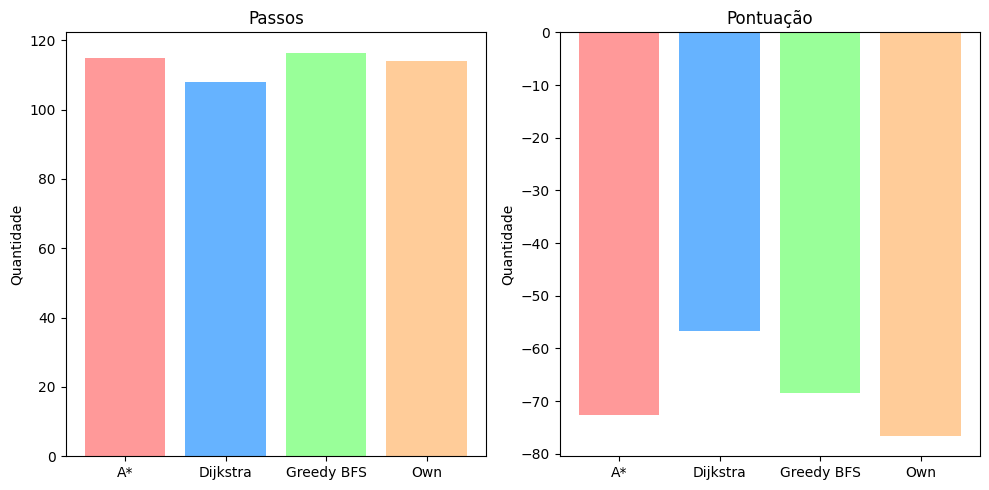

In [196]:
labels = ['A*', 'Dijkstra', 'Greedy BFS', 'Own']

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Primeiro gráfico de barras ---
ax1.bar(labels, valores1, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax1.set_title('Passos')
ax1.set_ylabel('Quantidade')  # Rótulo do eixo Y

# --- Segundo gráfico de barras ---
ax2.bar(labels, valores2, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax2.set_title('Pontuação')
ax2.set_ylabel('Quantidade')  # Rótulo do eixo Y

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 2º Gráfico de comparação passo a passo

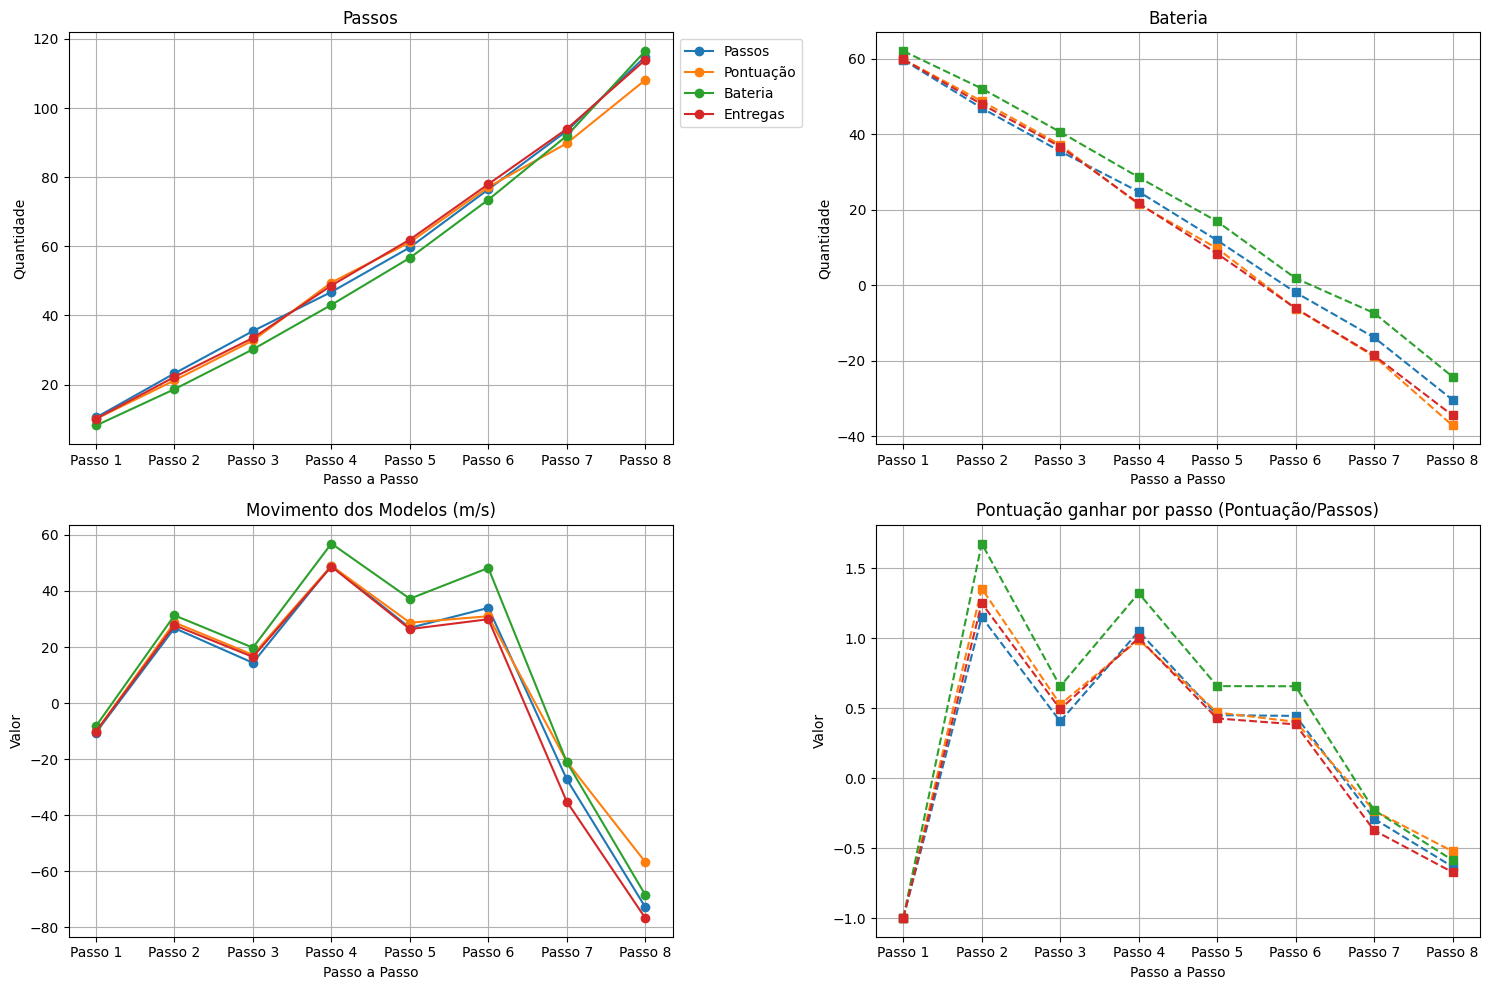

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (8 modelos x 8 momentos)
modelos = ['Passos', 'Pontuação', 'Bateria', 'Entregas']
momentos = [f'Passo {j}' for j in range(1, 9)]

# Matrizes de dados (substitua pelos seus valores reais)
movimento = np.random.uniform(0, 10, (8, 8))  # Ex: velocidades (m/s)
energia = np.random.uniform(100, 1000, (8, 8))  # Ex: energia (Joules)

# Criar figura com 2 subplots (1 linha, 2 colunas)
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 10))

for i in list(range(len(medias_dfs))):
    ax1.plot(momentos, medias_dfs[i]['Passos'], marker='o', label=modelos[i])
ax1.set_title('Passos')
ax1.set_xlabel('Passo a Passo')
ax1.set_ylabel('Quantidade')
ax1.legend(bbox_to_anchor=(1, 1))
ax1.grid(True)

for i in list(range(len(medias_dfs))):
    ax2.plot(momentos, medias_dfs[i]['Bateria'], marker='s', linestyle='--', label=modelos[i])
ax2.set_title('Bateria')
ax2.set_xlabel('Passo a Passo')
ax2.set_ylabel('Quantidade')
ax2.grid(True)

plt.tight_layout()

for i in list(range(len(medias_dfs))):
    ax3.plot(momentos, medias_dfs[i]['Pontuação'], marker='o', label=modelos[i])
ax3.set_title('Movimento dos Modelos (m/s)')
ax3.set_xlabel('Passo a Passo')
ax3.set_ylabel('Valor')
ax3.grid(True)

for i in list(range(len(medias_dfs))):
    ax4.plot(momentos, medias_dfs[i]['Pontuação'] / medias_dfs[i]['Passos'], marker='s', linestyle='--', label=modelos[i])
ax4.set_title('Pontuação ganhar por passo (Pontuação/Passos)')
ax4.set_xlabel('Passo a Passo')
ax4.set_ylabel('Valor')
ax4.grid(True)

plt.tight_layout()
plt.show()

## 3º Gráfico de correlação das variáveis

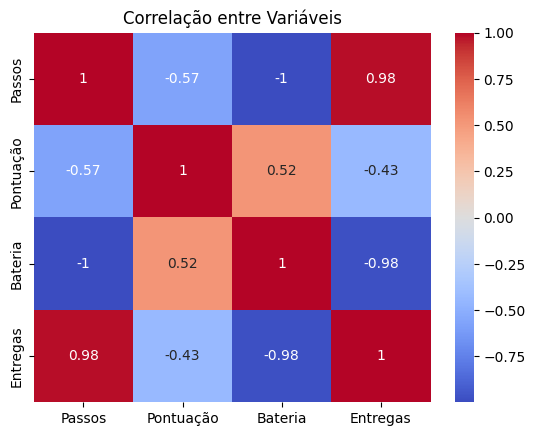

In [198]:
import seaborn as sns
import pandas as pd


data = medias_dfs[0][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

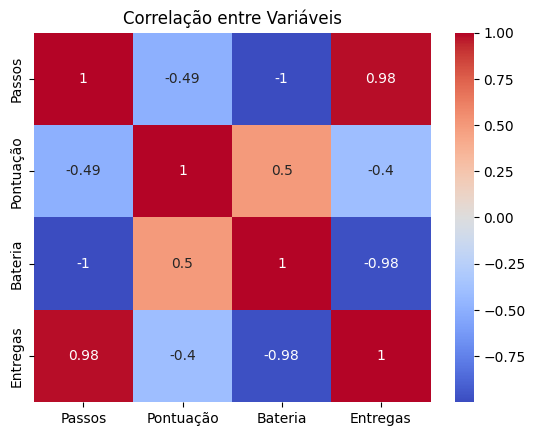

In [199]:
data = medias_dfs[1][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

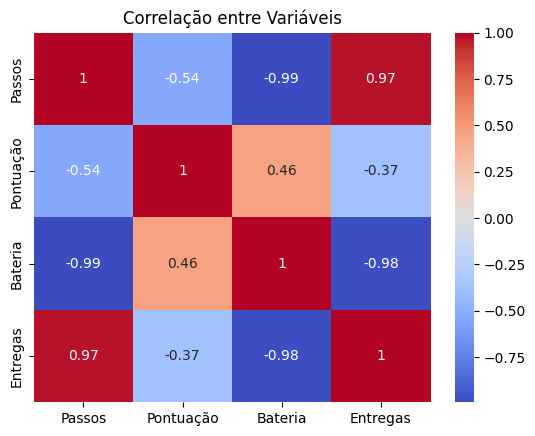

In [200]:
data = medias_dfs[2][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

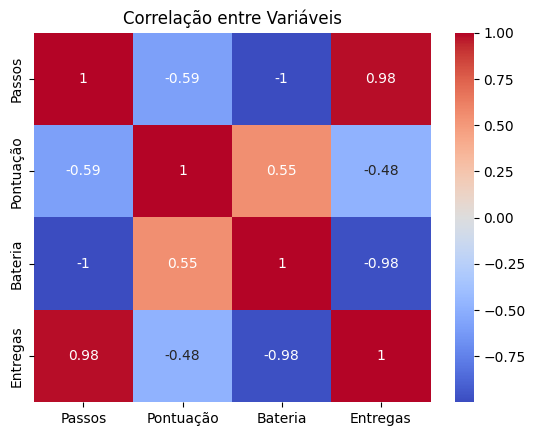

In [201]:
data = medias_dfs[3][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()